In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.interpolate
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_theme()
sns.set_style("ticks")
# plt.style.use('seaborn-white')

### Figure 2.1

In [2]:
#load Advertising dataset
ad = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/ISLR-python/master/Notebooks/Data/Advertising.csv', usecols=[1,2,3,4])
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


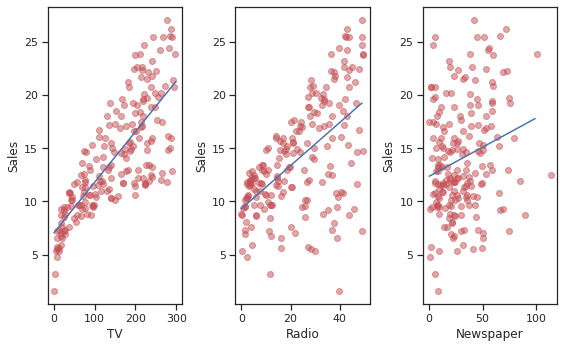

In [4]:
#figure 2.1  the plot of sales against other predictors in the dataset
fig, (ax1, ax2, ax3) =plt.subplots(1,3,figsize=(8,5))
ax1.scatter('TV','Sales', data= ad, alpha= 0.5, color='r')
x = np.arange(300)
m, b = np.polyfit(ad.TV, ad.Sales, 1)
y1= m*x+b
ax1.plot(x,y1, color ='b')
ax1.set_ylabel('Sales')
ax1.set_xlabel('TV')


ax2.scatter('Radio','Sales',data=ad, alpha=0.5, color='r')
m2,b2=np.polyfit(ad.Radio, ad.Sales, 1)
x2 = np.arange(50)
y2= m2*x2+b2
ax2.plot(x2,y2, color='b')
ax2.set_ylabel('Sales')
ax2.set_xlabel('Radio')


ax3.scatter('Newspaper', 'Sales',data=ad, alpha= 0.5, color='r')
m3,b3=np.polyfit(ad.Newspaper, ad.Sales, 1)
x3 = np.arange(100)
y3= m3*x3+b3
ax3.plot(x3,y3, color='b')
ax3.set_ylabel('Sales')
ax3.set_xlabel('Newspaper')
plt.tight_layout()

### Figure 2.2

In [5]:
Income1 = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/ISLR-python/master/Notebooks/Data/Income1.csv')
Income1.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


<AxesSubplot:xlabel='Education', ylabel='Income'>

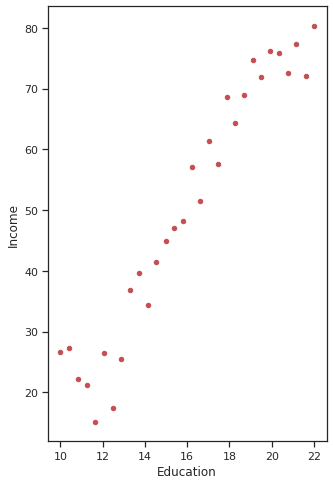

In [6]:
Income1.plot.scatter("Education","Income", color='r', figsize=(5,8))

### Figure 2.3 2.4 2.5 2.6 (TODO)

In [7]:
Income2 = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/ISLR-python/master/Notebooks/Data/Income2.csv')
Income2.head()

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922


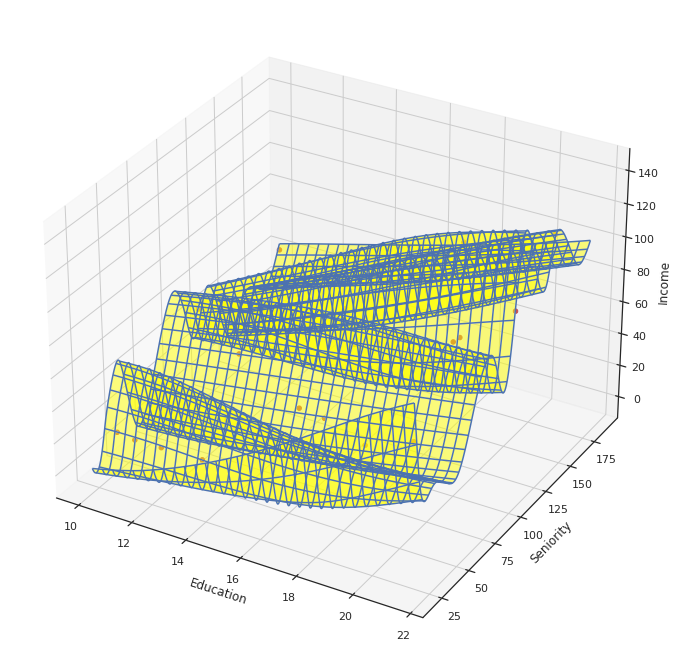

In [10]:
x, y, z = Income2.Education, Income2.Seniority, Income2.Income 
x_grid = np.linspace(min(x), max(x), 100*len(x))
y_grid = np.linspace(min(y), max(y), 100*len(y))
BX, BY = np.meshgrid(x_grid, y_grid, indexing='xy')

spline = sp.interpolate.Rbf(x,y,z,function='thin_plate', smooth=100)
BZ = spline(BX,BY)-2.0

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter3D(x,y,z, c='r', alpha=1.0)
ax.plot_surface(BX, BY, BZ, rstride=50, cstride=100, alpha=0.5, color='yellow', shade=False)
ax.plot_wireframe(BX, BY, BZ, rstride=50, cstride=100, color='b')

ax.set_xlabel("Education")
ax.set_ylabel("Seniority")
ax.set_zlabel("Income");